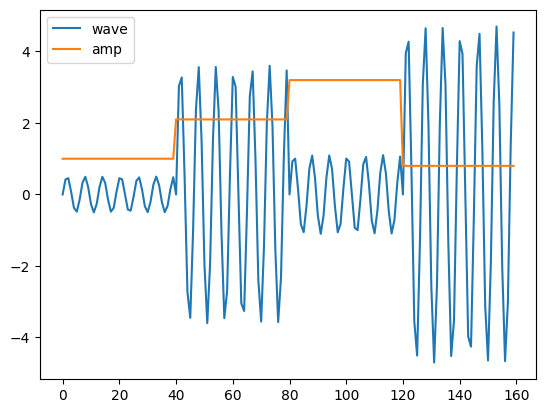

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import neurolab as nl 
%matplotlib inline

def get_data(n):
    wave_1 = 0.5 * np.sin(np.arange(0, n)) 
    wave_2 = 3.6 * np.sin(np.arange(0, n)) 
    wave_3 = 1.1 * np.sin(np.arange(0, n)) 
    wave_4 = 4.7 * np.sin(np.arange(0, n)) 

    amp_1 = np.ones(n) 
    amp_2 = 2.1 + np.zeros(n) 
    amp_3 = 3.2 * np.ones(n) 
    amp_4 = 0.8 + np.zeros(n) 

    w = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(-1, 1) 
    a = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(-1, 1) 
    return w, a

num_points = 40 
wave, amp = get_data(num_points)

plt.figure()
p1, = plt.plot(wave)
p2, = plt.plot(amp)
plt.legend([p1, p2], ['wave', 'amp'])
plt.show()

Epoch: 100; Error: 0.8421682458440578;
Epoch: 200; Error: 0.7415301405647197;
Epoch: 300; Error: 0.13510577106285115;
Epoch: 400; Error: 0.06702014596608782;
Epoch: 500; Error: 0.051079335457945005;
Epoch: 600; Error: 0.04401213082374721;
Epoch: 700; Error: 0.042476515596293056;
Epoch: 800; Error: 0.04148291306388398;
Epoch: 900; Error: 0.041255845236543826;
Epoch: 1000; Error: 0.04000001269210794;
Epoch: 1100; Error: 0.04268921807444744;
Epoch: 1200; Error: 0.03913147831430917;
The maximum number of train epochs is reached


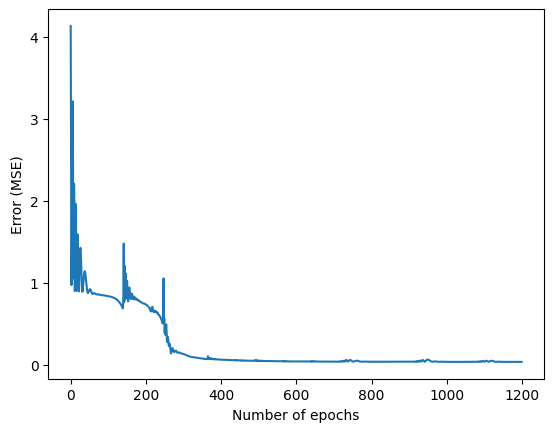

In [41]:
nn = nl.net.newelm([[-5, 5]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()]) 
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb') 
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb') 
nn.init() 

error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01) 

plt.figure()
plt.plot(error_progress) 
plt.xlabel('Number of epochs') 
plt.ylabel('Error (MSE)') 
plt.show()

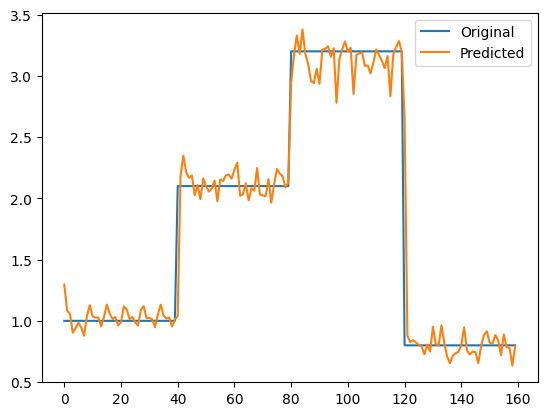

In [42]:
def visualize_output(original, predicted, xlim=None):
    plt.figure()
    p1, = plt.plot(original)
    p2, = plt.plot(predicted)
    plt.legend([p1, p2], ['Original', 'Predicted'])
    if xlim is not None:
        plt.xlim(xlim)
    plt.show()

output = nn.sim(wave)
visualize_output(amp, output)

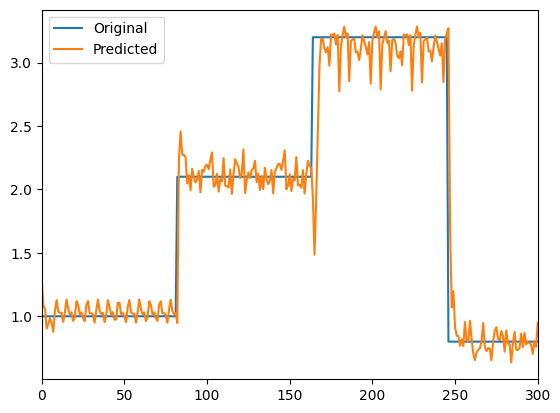

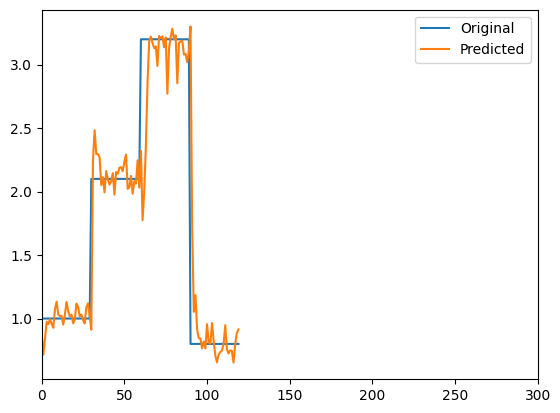

In [43]:
i, o = get_data(82)
p = nn.sim(i)
visualize_output(o, p, [0, 300])

i, o = get_data(30)
p = nn.sim(i)
visualize_output(o, p, [0, 300])